In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
directory = "../data/30Test.xlsx"

In [9]:
df_overall = pd.read_excel(directory)
correlation = df_overall["Correlation"]

In [10]:
correlation

0     {1.0: 0.7615000000000016, 1.4142135623730951: ...
1     {1.0: 0.7543333333333337, 1.4142135623730951: ...
2     {1.0: 0.7561666666666673, 1.4142135623730951: ...
3     {1.0: 0.7680000000000019, 1.4142135623730951: ...
4     {1.0: 0.7745000000000015, 1.4142135623730951: ...
5     {1.0: 0.7741666666666677, 1.4142135623730951: ...
6     {1.0: 0.7341666666666667, 1.4142135623730951: ...
7     {1.0: 0.738833333333334, 1.4142135623730951: 0...
8     {1.0: 0.7530000000000013, 1.4142135623730951: ...
9     {1.0: 0.7700000000000011, 1.4142135623730951: ...
10    {1.0: 0.7581666666666675, 1.4142135623730951: ...
11    {1.0: 0.7506666666666683, 1.4142135623730951: ...
12    {1.0: 0.7448333333333342, 1.4142135623730951: ...
13    {1.0: 0.7253333333333346, 1.4142135623730951: ...
14    {1.0: 0.7558333333333345, 1.4142135623730951: ...
15    {1.0: 0.7471666666666663, 1.4142135623730951: ...
16    {1.0: 0.7293333333333343, 1.4142135623730951: ...
17    {1.0: 0.684499999999999, 1.414213562373095

In [11]:
index_to_t = {}
t_to_index = {}
_T_ = np.linspace(2.22,2.32,50)
for i in range(len(_T_)):
    index_to_t[i] = _T_[i]
    t_to_index[_T_[i]] = i

50


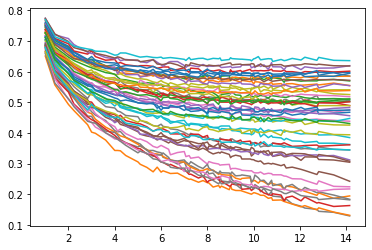

In [12]:
for j in range(50,51):
    for i in range(50):
        df_n_t = ast.literal_eval(correlation[i])
        plt.plot(df_n_t.keys(),df_n_t.values())
    print(j) 
    plt.show()

In [13]:
df_magn["N=20"]

0    0.772520
1    0.761355
2    0.675650
3    0.758870
4    0.745175
5    0.572525
6    0.706830
7    0.475765
8    0.699660
9    0.509170
Name: N=20, dtype: float64

[0.17566667 0.1195     0.09766667 0.07958333 0.054      0.06383333
 0.05125    0.03241667 0.03683333 0.034      0.02533333 0.02508333
 0.01722222 0.01916667 0.017      0.01166667 0.01433333 0.01283333
 0.015      0.01558333]
[0.2005     0.14866667 0.12133333 0.09758333 0.07933333 0.08016667
 0.062      0.05983333 0.05616667 0.04933333 0.04166667 0.0415
 0.03788889 0.0315     0.03216667 0.036      0.033      0.03033333
 0.02816667 0.0295    ]
[0.1905     0.136      0.11433333 0.087      0.07283333 0.07533333
 0.06341667 0.05416667 0.04583333 0.04716667 0.04266667 0.04033333
 0.03227778 0.03291667 0.02741667 0.02233333 0.02725    0.02316667
 0.02441667 0.01841667]
[0.174      0.11466667 0.09733333 0.0735     0.0635     0.074
 0.05533333 0.0435     0.04616667 0.03333333 0.036      0.02883333
 0.02388889 0.02583333 0.02591667 0.02333333 0.0175     0.02
 0.02175    0.02141667]
[0.16816667 0.11416667 0.10183333 0.08225    0.05733333 0.05316667
 0.05266667 0.04008333 0.03566667 0.03925    0.0

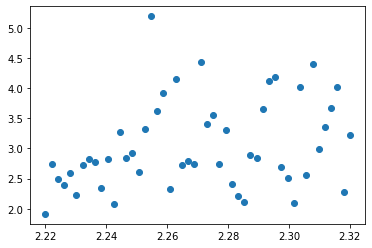

In [13]:
lattice_sizes = [x for x in range(30, 31)]
#df_ret = pd.DataFrame(_T_,columns=["Temperature"])
df_ret = pd.DataFrame([x for x in range(50)],columns=["Temperature"])
length = 20
for N in lattice_sizes:
    xis = []
    for i in range(len(correlation)): #loop iterates through all temperatures
        #i is index of the string of the dictionary
        

        df_n_t = ast.literal_eval(correlation[i]) # {distance:value}
        t = index_to_t[i] # temperature
        
        d = list(df_n_t.keys())[:length]
        values =  list(df_n_t.values())
        magnetization_squared = np.min(values)
        values = np.array(values[:length])
        
        #magnetization_squared = df_magn["N="+str(N)][i] ** 2

        # print("N="+str(N)+" T="+str(i))
        # print(df_n_t.values())
        print(values-magnetization_squared)
        a = np.log(values - magnetization_squared)
        # print("Values:", values)
        # print("Magnetization_Squared:", magnetization_squared)
        distances = []
        left_side = []
        for x in range(len(a)):
            if (a[x] != -1*np.inf or a[x] != np.nan) and d[x] <= 6:
                distances.append(d[x])
                left_side.append(a[x])
        # A = np.vstack([distances, np.ones(len(distances))]).T
        # slope, c = np.linalg.lstsq(A,left_side,rcond=0)[0]
        # print(distances)
        # print(left_side)
        slope, intercept, r_value, p_value, std_err = stats.linregress(distances, left_side)
        # if N == 20:
        #     # print(values - magnetization_squared)
        #     plt.plot(distances,left_side)
        #     plt.plot(distances,np.array(distances) * slope + intercept)
        #     plt.show()
           
            # print(distances)
            #print(values)
        xi = -1 / slope
        xis.append(xi)
    df_ret["N="+str(N)] = xis
    #print("size: "+str(N))
    plt.scatter(np.linspace(2.22, 2.32, 50), xis)
    plt.show()
    # if N in [36,44,50]:
    #     plt.scatter(_T_,xis)
    #     plt.savefig("XiN="+str(N)+".pdf")
    #     plt.clf()
        

        


type(df["N=4"])

In [9]:
df_j = pd.read_excel("Junk/4.xlsx")

In [11]:
df_j["EnergyVsSweep"]

0     0     -2.00\n1     -2.00\n2     -1.00\n3     -...
1     0     -1.5\n1     -1.5\n2     -2.0\n3     -2.0...
2     0     -2.00\n1     -2.00\n2     -2.00\n3     -...
3     0     -2.00\n1     -2.00\n2     -1.25\n3     -...
4     0     -2.0\n1     -2.0\n2     -2.0\n3     -2.0...
5     0     -1.25\n1     -0.50\n2     -0.75\n3     -...
6     0     -2.00\n1     -1.50\n2     -1.25\n3     -...
7     0     -2.0\n1     -2.0\n2     -1.5\n3     -1.5...
8     0     -2.0\n1     -2.0\n2     -2.0\n3     -1.5...
9     0     -2.00\n1     -2.00\n2     -2.00\n3     -...
10    0     -1.50\n1     -1.50\n2     -1.00\n3     -...
11    0     -2.00\n1     -1.50\n2     -1.25\n3     -...
12    0     -2.0\n1     -2.0\n2     -2.0\n3     -2.0...
13    0     -2.00\n1     -2.00\n2     -2.00\n3     -...
14    0     -1.50\n1     -1.50\n2     -1.25\n3     -...
15    0     -2.00\n1     -1.50\n2     -2.00\n3     -...
16    0     -2.00\n1     -1.50\n2     -2.00\n3     -...
17    0     -2.0\n1     -2.0\n2     -1.5\n3     

In [67]:
np.log(0)

/var/folders/hh/gwwp6tv97g7c18zl0pp7rkl80000gp/T/ipykernel_3888/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf